In [1]:
#%autosave 0
from IPython.core.display import HTML, display
display(HTML('<style>.container { width:100%; !important } </style>'))

# Ordered Binary Trees

In [2]:
class OrderedBinaryTree:
    def __init__(self):
        self.mKey   = None
        self.mValue = None
        self.mLeft  = None
        self.mRight = None

In [3]:
def isEmpty(self):
    return self.mKey == None

OrderedBinaryTree.isEmpty = isEmpty

In [4]:
def find(self, key):
    if self.isEmpty():
        return None
    elif self.mKey == key:
        return self.mValue
    elif key < self.mKey:
        return self.mLeft.find(key)
    else:
        return self.mRight.find(key)
    
OrderedBinaryTree.find = find

In [5]:
def insert(self, key, value):
    if self.isEmpty():
        self.mKey   = key
        self.mValue = value
        self.mLeft  = OrderedBinaryTree()
        self.mRight = OrderedBinaryTree()
    elif self.mKey == key:
        self.mValue = value
    elif key < self.mKey:
        self.mLeft.insert(key, value)
    else:
        self.mRight.insert(key, value)

OrderedBinaryTree.insert = insert

In [6]:
def delete(self, key):
    if self.isEmpty():
        return
    if key == self.mKey:
        if self.mLeft.isEmpty():
            self._update(self.mRight)
        elif self.mRight.isEmpty():
            self._update(self.mLeft)
        else:
            rs, km, vm = self.mRight._delMin()
            self.mKey   = km
            self.mValue = vm
            self.mRight = rs
    elif key < self.mKey:
        self.mLeft.delete(key)
    else:
        self.mRight.delete(key)
        
OrderedBinaryTree.delete = delete

In [7]:
def _delMin(self):
    if self.mLeft.isEmpty():
        return (self.mRight, self.mKey, self.mValue)
    else:
        ls, km, vm = self.mLeft._delMin()
        self.mLeft = ls
        return self, km, vm
    
OrderedBinaryTree._delMin = _delMin

In [8]:
def _toString(self, n):
    if self.isEmpty():
        return " " * n + 'Nil'
    else:
        return self.mLeft._toString(n + 4) + '\n' + \
               ' ' * n + '<' + str(self.mKey) + ' |-> ' + str(self.mValue) + '>\n' + \
               self.mRight._toString(n + 4)
    
OrderedBinaryTree._toString = _toString

In [9]:
def myStr(self):
    return self._toString(0)

OrderedBinaryTree.__str__ = myStr

In [10]:
def demo():
    m = OrderedBinaryTree()
    m.insert("anton",  123)
    m.insert("hugo" ,  345)
    m.insert("gustav", 789)
    m.insert("jens",   234)
    m.insert("hubert", 432)
    m.insert("andre",  342)
    m.insert("philipp",  342)
    m.insert("rene",   345)
    print(m)
    print(f"m.find('hubert') = {m.find('hubert')}")
    m.delete('anton')
    print(m)
    return m

In [11]:
t = demo()

        Nil
    <andre |-> 342>
        Nil
<anton |-> 123>
            Nil
        <gustav |-> 789>
                Nil
            <hubert |-> 432>
                Nil
    <hugo |-> 345>
            Nil
        <jens |-> 234>
                Nil
            <philipp |-> 342>
                    Nil
                <rene |-> 345>
                    Nil
m.find('hubert') = 432
        Nil
    <andre |-> 342>
        Nil
<gustav |-> 789>
            Nil
        <hubert |-> 432>
            Nil
    <hugo |-> 345>
            Nil
        <jens |-> 234>
                Nil
            <philipp |-> 342>
                    Nil
                <rene |-> 345>
                    Nil


In [12]:
import graphviz as gv

In [13]:
def _assignIDs(self, NodeDict):
    if self.isEmpty():
        return
    OrderedBinaryTree.sNodeCount += 1
    self.mID = OrderedBinaryTree.sNodeCount
    NodeDict[self.mID] = self
    self.mLeft ._assignIDs(NodeDict)
    self.mRight._assignIDs(NodeDict)
    
OrderedBinaryTree._assignIDs = _assignIDs

Given an ordered binary tree, this function renders the tree graphically using `graphviz`.

In [14]:
def toDot(self):
    OrderedBinaryTree.sNodeCount = 0 # static variable of class OrderedBinaryTree
    dot = gv.Digraph()
    NodeDict = {}
    self._assignIDs(NodeDict)
    for n in NodeDict:
        dot.node(str(n))
    for n, t in NodeDict.items():
        if not t.mLeft.isEmpty():
            dot.edge(str(n), str(t.mLeft.mID))
        if not t.mRight.isEmpty():
            dot.edge(str(n), str(t.mRight.mID))
    return dot

OrderedBinaryTree.toDot = toDot

In [15]:
d = t.toDot()

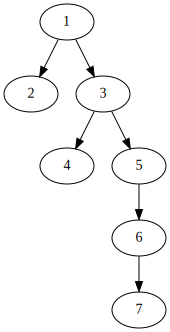

In [16]:
d